# Grid plot of the photodiode area

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#access data from hdf5 file IRdetection\Experiments\PhotodiodeArea\run-5\integrals.h5
with h5py.File('../Experiments/PhotodiodeArea/run-5/integrals.h5', 'r') as f:
    a_group_key = list(f.keys())
    data = []
    freq_duty = []
    frequencies = []
    duties = [] 
    for a in a_group_key:
        data.append(f[a][:])
        freq_duty.append((f[a].attrs['frequency'], f[a].attrs['duty_cycle']))
        frequencies.append(f[a].attrs['frequency'])
        duties.append(f[a].attrs['duty_cycle'])
    
# Convert to numpy arrays
frequencies = np.array(frequencies)
duties = np.array(duties)

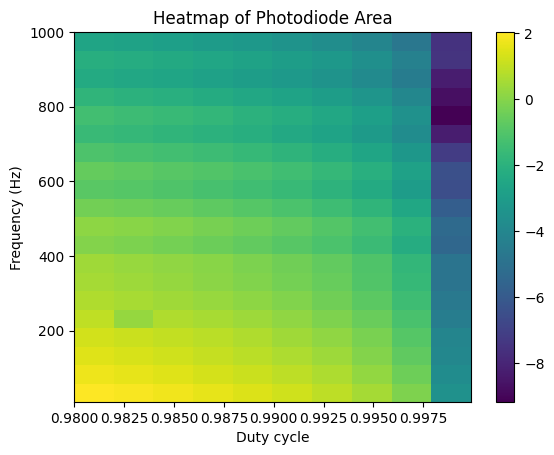

In [ ]:
#create heatmap of the data[0][:]

# Reshape data for the heatmap
unique_frequencies = np.unique(frequencies)
unique_duties = np.unique(duties)
heatmap_data = np.ones((len(unique_frequencies), len(unique_duties)))*999

for i, freq in enumerate(unique_frequencies):
    for j, duty in enumerate(unique_duties):
        # Find the index where this frequency and duty cycle combination exists
        idx = np.where((frequencies == freq) & (duties == duty))[0]
        if len(idx) > 0:
            # Using first element of data array for heatmap
            heatmap_data[i, j] = np.log(np.abs(data[idx[0]][0])) # Using first value of the data point

plt.imshow(heatmap_data, cmap='viridis', 
           extent=[min(unique_duties), max(unique_duties), min(unique_frequencies), max(unique_frequencies)],
           aspect='auto', origin='lower')
plt.colorbar()
plt.title('Heatmap of Photodiode Area')
plt.xlabel('Duty cycle')
plt.ylabel('Frequency (Hz)')
plt.show()

## Fixed frequency sweep

In [ ]:
with h5py.File('../Experiments/PhotodiodeArea/run-6/integrals.h5', 'r') as f:
    a_group_key = list(f.keys())
    data = []
    freq_duty = []
    frequencies = []
    duties = [] 
    for a in a_group_key:
        data.append(f[a][:])
        freq_duty.append((f[a].attrs['frequency'], f[a].attrs['duty_cycle']))
        frequencies.append(f[a].attrs['frequency'])
        duties.append(f[a].attrs['duty_cycle'])
    
# Convert to numpy arrays
frequency = frequencies[0]
duties = np.array(duties)
print(duties)
integrals = np.array(data)

[0.9939 0.994  0.9941 0.9942 0.9943 0.9944 0.9945 0.9946 0.9947 0.9948
 0.9949 0.995  0.9951 0.9952 0.9953 0.9954 0.9955 0.9956 0.9957 0.9958
 0.9959 0.996  0.9961 0.9962 0.9963 0.9964 0.9965 0.9966 0.9967 0.9968
 0.9969 0.997  0.9971 0.9972 0.9973 0.9974 0.9975 0.9976 0.9977 0.9978
 0.9979 0.9981 0.9982 0.9983 0.9984 0.9985 0.9986 0.9987 0.9988 0.9989]


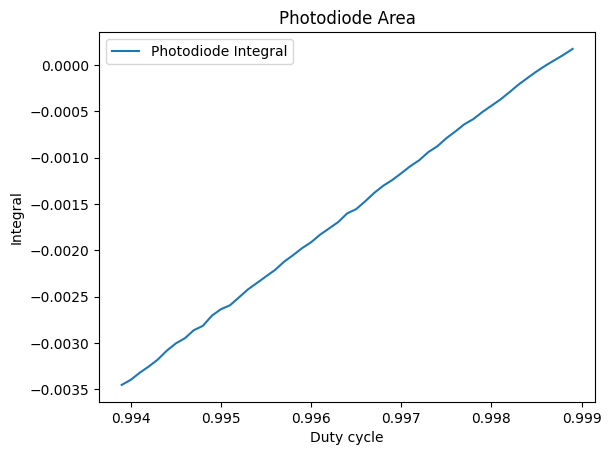

In [ ]:
plt.plot(duties, integrals[:,0], label='Photodiode Integral')
plt.title('Photodiode Area')
plt.xlabel('Duty cycle')
plt.ylabel('Integral')
plt.legend()
plt.show()

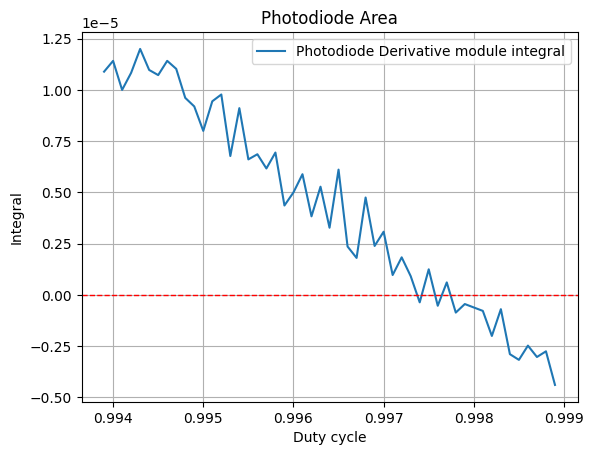

In [ ]:
plt.plot(duties, integrals[:,1], label='Photodiode Derivative module integral')
plt.title('Photodiode Area')
plt.xlabel('Duty cycle')
plt.ylabel('Integral')
plt.legend()
plt.grid()
# add horizontal line at y=0
plt.axhline(0, color='red', lw=1, ls='--')
plt.show()

In [ ]:
import sys
sys.path.append('../')

from src.io.h5 import H5Manager

c:\Users\kid\labQT\Lab2024\SINGLE_PHOTON\QTLab2425\IRdetection\Analysis\..\src\io\h5.py:7: SyntaxWarning: invalid escape sequence '\<'
  """


In [ ]:
data_raw = H5Manager('../Experiments/PhotodiodeArea/run-6/raw_data.h5')
voltages = [data_raw.get_datase()]

{'raw_data.h5': {'type': 'file',
  'metadata': {},
  'content': [{'freq-8333.333333333334_duty-0.9939': {'type': 'dataset',
     'metadata': {'amplitude': np.float64(0.712),
      'duty_cycle': np.float64(0.9939),
      'frequency': np.float64(8333.333333333334),
      'offset': np.float64(-0.356)},
     'content': array([[ 0.00000000e+00,  1.20000000e-09,  2.40000000e-09, ...,
              2.68440000e-06,  2.68560000e-06,  2.68680000e-06],
            [ 0.00000000e+00,  0.00000000e+00, -4.61368110e+01, ...,
             -9.24274114e+01, -9.24274114e+01, -9.24274114e+01]],
           shape=(2, 2240))}},
   {'freq-8333.333333333334_duty-0.994': {'type': 'dataset',
     'metadata': {'amplitude': np.float64(0.712),
      'duty_cycle': np.float64(0.994),
      'frequency': np.float64(8333.333333333334),
      'offset': np.float64(-0.356)},
     'content': array([[ 0.00000000e+00,  1.20000000e-09,  2.40000000e-09, ...,
              2.64240000e-06,  2.64360000e-06,  2.64480000e-06],
      

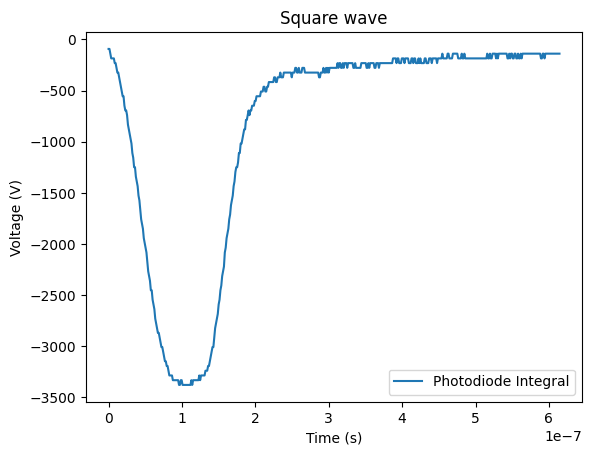

In [ ]:
with h5py.File('../Experiments/PhotodiodeArea/run-6/raw_data.h5', 'r') as f:
    a_group_key = list(f.keys())
    data = []
    voltage = []
    time = []
    freq_duty = []
    frequencies = []
    duties = [] 
    for a in a_group_key:
        data.append(f[a][:])
        freq_duty.append((f[a].attrs['frequency'], f[a].attrs['duty_cycle']))
        frequencies.append(f[a].attrs['frequency'])
        duties.append(f[a].attrs['duty_cycle'])
    
# Convert to numpy arrays
frequency = frequencies[0]
duties = np.array(duties)
data
voltages = [d[1] for d in data]
times = [d[0] for d in data]

plt.plot(times[46], voltages[46], label='Square wave')
plt.title('Square wave')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()

NameError: name 'typography' is not defined

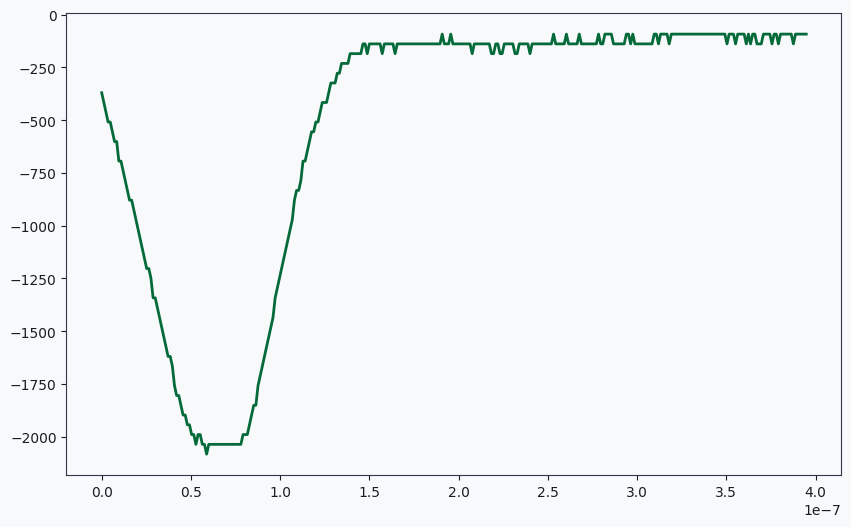

In [ ]:
# Convert time to nanoseconds
times_ns = times[-1] * 1e9

# Convert voltage

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(times_ns, voltages[-1] / 1000, 
    label='Shortest time window', 
    color="#046A3A",
    linewidth=2)

ax.set_xlim(-1, 200)  # adjust limits for nanoseconds

ax.set_facecolor("#F8F9FB")
fig.patch.set_facecolor("#F8F9FB")
ax.spines['bottom'].set_color("#2D3748")
ax.spines['top'].set_color("#2D3748")
ax.spines['left'].set_color("#2D3748")
ax.spines['right'].set_color("#2D3748")
ax.tick_params(colors="#1A1B23")

ax.set_title('Square Wave Signal Used for LD Excitation', fontsize=16, fontweight='bold')
ax.set_xlabel('Time (ns)', fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.3, color="#2D3748")
ax.legend(facecolor="#F8F9FB", edgecolor="#2D3748", fontsize=10)

plt.show()
